In [1]:
import torch
from torch import nn

torch.__version__

'1.13.1'

In [2]:
# Setup device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [7]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f'{image_path} directory alaready exists... skipping download')
else:
    print(f'{image_path} does not exist, creating one...')
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / 'pizza_steak_sushi.zip','wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Donwloading pizza, steak, sushi data...')
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    print('Unzipping piza, steak, sushi data...')
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory alaready exists... skipping download
Donwloading pizza, steak, sushi data...
Unzipping piza, steak, sushi data...


In [8]:
import os 
def walk_through_dir(dir_path):
    '''Walks through dir_path directory returning it's contents.'''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'there are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

In [9]:
walk_through_dir(image_path)

there are 2 directories and 0 images in "data/pizza_steak_sushi".
there are 3 directories and 0 images in "data/pizza_steak_sushi/test".
there are 0 directories and 19 images in "data/pizza_steak_sushi/test/steak".
there are 0 directories and 31 images in "data/pizza_steak_sushi/test/sushi".
there are 0 directories and 25 images in "data/pizza_steak_sushi/test/pizza".
there are 3 directories and 0 images in "data/pizza_steak_sushi/train".
there are 0 directories and 75 images in "data/pizza_steak_sushi/train/steak".
there are 0 directories and 72 images in "data/pizza_steak_sushi/train/sushi".
there are 0 directories and 78 images in "data/pizza_steak_sushi/train/pizza".


In [10]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'


train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice
3. Get the image class name using `pathlib.Path.parent.item`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

data/pizza_steak_sushi/test/sushi/207578.jpg
sushi
Random image path data/pizza_steak_sushi/test/sushi/207578.jpg
Image class: sushi
Image height: 512
Image width: 382


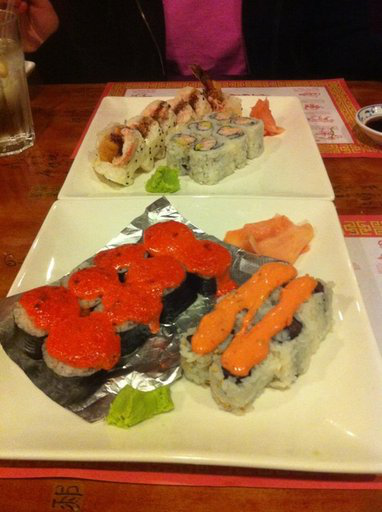

In [24]:
import random
from PIL import Image

# set seed
random.seed(2)

# Get all the image paths

image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list

# Pick a randpm image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get the image class from the path name( the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# Open image 
img = Image.open(random_image_path)

# Print metadata
print(f'Random image path {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 381.5, 511.5, -0.5)

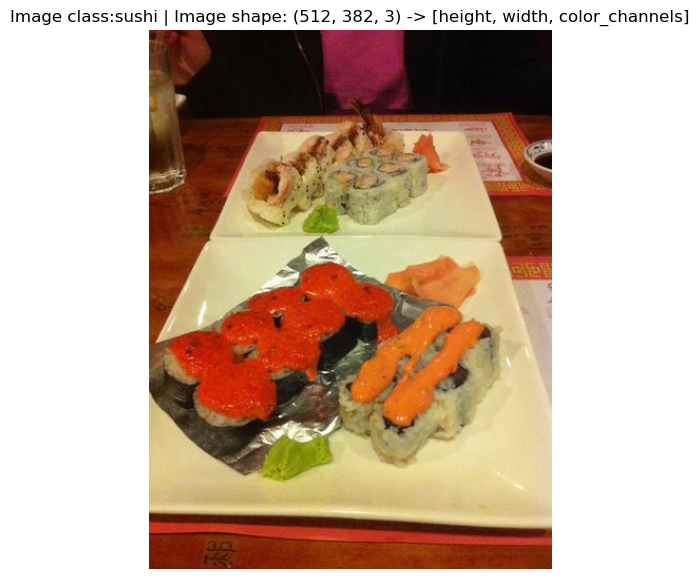

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 

# Turn the image into array
img_as_array = np.asanyarray(img)

# Plot he image in matplotlib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]')
plt.axis(False)

## Transforming data

Before we can use our image data Pytorch:
1. Turn your target data into tensors( in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader`, we'll call these `Dataset` and `DataLoader`.

In [27]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Transforming data with `torchvision.transforms`

In [28]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64 ,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the images into torch.Tensor
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.3294, 0.3882, 0.3804,  ..., 0.0471, 0.0627, 0.0667],
         [0.4039, 0.4039, 0.3647,  ..., 0.0431, 0.0627, 0.0667],
         [0.4039, 0.3804, 0.3216,  ..., 0.0471, 0.0627, 0.0667],
         ...,
         [0.4824, 0.4824, 0.4902,  ..., 0.5490, 0.5490, 0.5490],
         [0.4784, 0.4784, 0.4863,  ..., 0.4784, 0.4706, 0.4706],
         [0.4510, 0.4627, 0.4706,  ..., 0.4706, 0.4549, 0.4549]],

        [[0.1137, 0.1647, 0.1294,  ..., 0.0275, 0.0275, 0.0235],
         [0.1961, 0.2078, 0.1490,  ..., 0.0314, 0.0275, 0.0235],
         [0.2000, 0.2039, 0.1529,  ..., 0.0314, 0.0275, 0.0235],
         ...,
         [0.1098, 0.1059, 0.1098,  ..., 0.1725, 0.1725, 0.1843],
         [0.1137, 0.1098, 0.1098,  ..., 0.1569, 0.1529, 0.1647],
         [0.1020, 0.1059, 0.1098,  ..., 0.1608, 0.1569, 0.1569]],

        [[0.0471, 0.0980, 0.0627,  ..., 0.0471, 0.0471, 0.0471],
         [0.1020, 0.1059, 0.0706,  ..., 0.0431, 0.0471, 0.0471],
         [0.0863, 0.1059, 0.0745,  ..., 0.0431, 0.0392, 0.

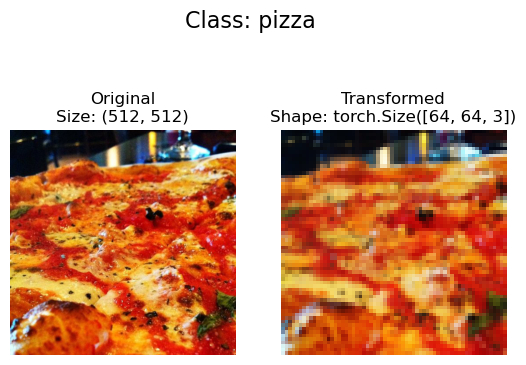

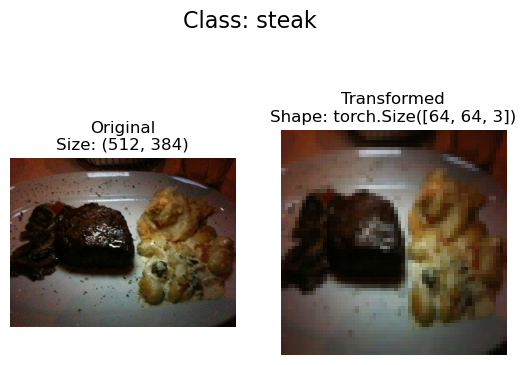

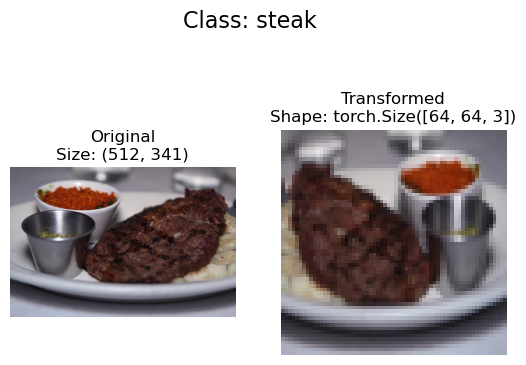

In [29]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """ 
    Selects random images from a path of images and loads/transforms
    them then plors the original vs the transformed version"""

    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) #matplotlib takes color channel as first input
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}',fontsize=16)


plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed = 42)